In [8]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
#plt.rcParams['text.usetex'] = True
%matplotlib inline

In [106]:
x = 0
for a in aperture:
    if a == 3:
        x += 1
print(x)
print(len(aperture))

63
1304


In [9]:
#total noise model
noise_x = np.array([4.984, 5, 5.187, 5.411, 5.692, 6, 6.014, 6.266, 6.547, 6.855, 7, 7.164, 7.472, 7.766, 8, 8.047, 8.341, 8.65, 8.944, 9, 9.238, 9.519, 9.785, 10, 10.093, 10.346, 10.626, 10.879, 11, 11.103, 11.327, 11.537, 11.748, 11.986, 12, 12.21, 12.435, 12.673, 12.925, 13, 13.192, 13.444, 13.71, 13.977, 14, 14.257, 14.495, 14.776, 15, 15.042, 15.308, 15.589, 15.855, 16, 16.079, 16.304, 16.542, 16.78, 17, 17.033, 17.257, 17.495, 17.72, 17.86, 17.993])
noise_y = np.array([63.99391413, 64.00663848, 63.99391413, 63.99391413, 65.13524045, 67.40068791, 67.48018854, 68.68413482, 71.15578391, 73.71718685, 75.48221794, 77.73147303, 81.96518443, 87.96998504, 93.22540367, 94.41550073, 103.1416362, 112.6740933, 125.2816263, 127.8064474, 139.3008741, 157.6496756, 178.4184172, 194.2458356, 201.9220322, 228.5214624, 263.2355857, 297.9107956, 318.0720022, 337.1564338, 381.568172, 424.2681273, 488.7177886, 553.0990989, 557.4558229, 637.1235248, 733.9104005, 860.4793686, 1008.877829, 1063.638619, 1225.436945, 1462.402009, 1807.995505, 2196.093633, 2232.771429, 2715.070838, 3356.6963, 4223.956958, 5124.672299, 5315.303516, 6688.612696, 8566.857254, 10591.36339, 12140.96674, 13094.30924, 15905.06625, 19663.73292, 24310.64681, 30186.17655, 31137.3822, 37821.18204, 46759.04159, 57809.09927, 65424.28179, 74042.62209])

#star noise model
y1, x1, y2, x2, y3, x3 = 26.41, 6, 111.9, 9.167, 7937, 18
m1 = (np.log10(y2) - np.log10(y1)) / (x2 - x1)
m2 = (np.log10(y3) - np.log10(y2)) / (x3 - x2)
c1 = np.log10(y1) - m1 * x1
c2 = np.log10(y2) - m2 * x2
starnoise_x = np.linspace(x1, x3, 500)
starnoise_y = np.piecewise(starnoise_x, [starnoise_x < x2, starnoise_x >= x2], [lambda starnoise_x: 10**(m1 * starnoise_x + c1), lambda starnoise_x: 10**(m2 * starnoise_x + c2)])

In [5]:
file = "AGN Imag 700"
#file = "non-AGN Imag 30am 700"
#file = "AGN Rmag 100"
o1 = 1 #old (0) or new (1) file structure
newnew = 1 #new file structure including type
new3 = 1 #includes iqr and von Neumann ratio
elk = 0
cleaned = 0
diameter = 0
method = 'f'

import csv
import numpy as np
fullfile = 'target stats/'+file
if method == 's':
    fullfile = fullfile + ' simple_hybrid'
elif method == 'p':
    fullfile = fullfile + ' PCA'
if diameter == 1:
    fullfile = fullfile + ' diameter'
if cleaned == 1:
    fullfile = fullfile + ' cleaned'
fullfile = fullfile + ' stats'
if new3 == 1:
    fullfile = fullfile + ' newnew'
elif newnew == 1:
    fullfile = fullfile + ' new'
if elk == 1:
    fullfile = 'target stats/elk '+file+' stats'
    
with open(fullfile+'.txt', 'r') as file:
    reader = csv.reader(file, delimiter='\t')
    next(reader, None)
    galaxies, sectors, meanflux, medianflux, std, std_1, std_2, std_3, cod, cod_1 = [], [], [], [], [], [], [], [], [], []
    cod_2, cod_3, mad, mad_1, mad_2, mad_3, mag, mag_1, mag_2, mag_3 = [], [], [], [], [], [], [], [], [], []
    simbadmag, aperture, diameter, types = [], [], [], []
    fluxratio, iqr, oneovereta, iqr_1, iqr_2, iqr_3  = [], [], [], [], [], []
    for row in reader:
        galaxies.append(row[0])
        sectors.append(row[1])
        meanflux.append(float(row[2]))
        medianflux.append(float(row[3]))
        mag.append(float(row[6+o1]))
        #fluxratio.append(float(row[12])) #only for erosita?
        if newnew == 1:
            if row[8] != '--' and row[8] != 'None':
                simbadmag.append(float(row[8]))
            else:
                simbadmag.append(float('nan'))
            aperture.append(float(row[9])-1)
            if row[10] != 'None':
                diameter.append(float(row[10]))
            else:
                diameter.append(float('nan'))
            types.append(row[11])
        if float(row[1]) <= 26:
            cod.append(float(row[4+o1]))
            std.append(float(row[3+o1]))
            std_1.append(float(row[3+o1]))
            cod_1.append(float(row[4+o1]))
            mag_1.append(float(row[6+o1]))
            if row[5+o1] != '':
                mad_1.append(float(row[5+o1]))
                mad.append(float(row[5+o1]))
            else:
                mad_1.append(float('nan'))
                mad.append(float('nan'))
            if new3 == 1:
                iqr.append(float(row[12]))
                iqr_1.append(float(row[12]))
                oneovereta.append(float(row[13]))
        elif float(row[1]) > 26 and float(row[1]) < 56:
            cod.append(float(row[4+o1]) / np.sqrt(3))
            std.append(float(row[3+o1]) / np.sqrt(3))
            std_2.append(float(row[3+o1]))
            cod_2.append(float(row[4+o1]))
            mag_2.append(float(row[6+o1]))
            if row[5+o1] != '':
                mad_2.append(float(row[5+o1]))
                mad.append(float(row[5+o1]) / np.sqrt(3))
            else:
                mad_2.append(float('nan'))
                mad.append(float('nan'))
            if new3 == 1:
                iqr.append(float(row[12]) / np.sqrt(3))
                iqr_2.append(float(row[12]))
                oneovereta.append(float(row[13]))
        elif float(row[1]) >= 56:
            cod.append(float(row[4+o1]) / 3)
            std.append(float(row[3+o1]) / 3)
            std_3.append(float(row[3+o1]))
            cod_3.append(float(row[4+o1]))
            mag_3.append(float(row[6+o1]))
            if row[5+o1] != '':
                mad_3.append(float(row[5+o1]))
                mad.append(float(row[5+o1]) / 3)
            else:
                mad_3.append(float('nan'))   
                mad.append(float('nan'))  
            if new3 == 1:
                iqr.append(float(row[12]) / 3)
                iqr_3.append(float(row[12]))
                oneovereta.append(float(row[13]))
                
if newnew == 1:
    magSy1 = [x for x, f in zip(mag, types) if f == 'Seyfert1']
    magSy2 = [x for x, f in zip(mag, types) if f == 'Seyfert2']
    codSy1 = [x for x, f in zip(cod, types) if f == 'Seyfert1']
    codSy2 = [x for x, f in zip(cod, types) if f == 'Seyfert2']
    mdfmSy1 = [x for x, f in zip(mad, types) if f == 'Seyfert1']
    mdfmSy2 = [x for x, f in zip(mad, types) if f == 'Seyfert2']

"""std_1x = [x / np.sqrt(1) for x in std_1]
std_2x = [x / np.sqrt(3) for x in std_2]
std_3x = [x / np.sqrt(9) for x in std_3]
cod_1x = [x / np.sqrt(1) for x in cod_1]
cod_2x = [x / np.sqrt(3) for x in cod_2]
cod_3x = [x / np.sqrt(9) for x in cod_3]
mdfm_1x = [x / np.sqrt(1) for x in mad_1]
mdfm_2x = [x / np.sqrt(3) for x in mad_2]
mdfm_3x = [x / np.sqrt(9) for x in mad_3]"""
print('Done Corleone \n')

Done Corleone 



In [42]:
#statistics on entire sample
np.set_printoptions(precision=5)
from collections import Counter
unique_dict = {}
for i, value in enumerate(galaxies):
    if value not in unique_dict:
        unique_dict[value] = types[i]
    typecount = {}
    for value in unique_dict.values():
        if value not in typecount:
            typecount[value] = 1
        else:
            typecount[value] += 1
print('number of light curves\t',len(galaxies))
print('number of galaxies\t',len(set(galaxies)))
print('cycle 1 sectors\t',sum(1 for num in sectors if int(num) <= 13)) 
print('cycle 2 sectors\t',sum(1 for num in sectors if int(num) >= 14 and int(num) <= 26)) 
print('cycle 3 sectors\t',sum(1 for num in sectors if int(num) >= 27 and int(num) <= 39)) 
print('cycle 4 sectors\t',sum(1 for num in sectors if int(num) >= 40 and int(num) <= 55)) 
print('cycle 5 sectors\t',sum(1 for num in sectors if int(num) >= 56 and int(num) <= 69)) 
print('cycle 6 sectors\t',sum(1 for num in sectors if int(num) >= 70 )) 
print('mean mean flux\t',np.mean(meanflux))
print('median mean flux\t',np.median(meanflux))
print('mean median flux\t',np.mean(medianflux))
print('median median flux\t',np.median(medianflux))
print('mean TESS magnitude\t',np.mean(mag))
print('median TESS magnitude\t',np.median(mag))
print('mean Simbad magnitude\t',np.nanmean(simbadmag))
print('median Simbad magnitude\t',np.nanmedian(simbadmag))
print('mean Simbad diameter\t',np.nanmean(diameter))
print('median Simbad diameter\t',np.nanmean(diameter))
print('mean aperture size\t',np.mean(aperture))
print('median aperture size\t',np.median(aperture))
print('mean adjusted coefficient of dispersion\t',np.mean([x * np.sqrt(y) for x,y in zip(cod,meanflux)]))
print('median adjusted coefficient of dispersion\t',np.median([x * np.sqrt(y) for x,y in zip(cod,meanflux)]))
print('mean adjusted standard deviation\t',np.mean([x / np.sqrt(y) for x,y in zip(std,meanflux)]))
print('median adjusted standard deviation\t',np.median([x / np.sqrt(y) for x,y in zip(std,meanflux)]))
print('mean adjusted interquartile range\t',np.mean([x / np.sqrt(y) for x,y in zip(iqr,meanflux)]))
print('median adjusted interquartile range\t',np.median([x / np.sqrt(y) for x,y in zip(iqr,meanflux)]))
print('mean adjusted median absolute difference\t',np.mean([x / np.sqrt(y) for x,y in zip(mad,meanflux)]))
print('median adjusted median absolute difference\t',np.median([x / np.sqrt(y) for x,y in zip(mad,meanflux)]))
print('mean inverse von Neumann ratio\t',np.mean(oneovereta))
print('median inverse von Neumann ratio\t',np.median(oneovereta))
print('Simbad maintypes\t',typecount)
"""print('mean \t',np.mean())
print('median \t',np.median())
print('\t',)
print('\t',)"""

Done Corleone 

number of light curves	 163
number of galaxies	 61
cycle 1 sectors	 21
cycle 2 sectors	 52
cycle 3 sectors	 22
cycle 4 sectors	 41
cycle 5 sectors	 20
cycle 6 sectors	 7
mean mean flux	 67319.60190200267
median mean flux	 6762.119435703634
mean median flux	 67319.61588399688
median median flux	 6762.13623046875
mean TESS magnitude	 10.818747597294422
median TESS magnitude	 10.864792906977627
mean Simbad magnitude	 nan
median Simbad magnitude	 nan
mean Simbad diameter	 2.9522331629428393
median Simbad diameter	 2.9522331629428393
mean aperture size	 161.15246028327783
median aperture size	 8.727746296226666
mean adjusted coefficient of dispersion	 36983.980194685
median adjusted coefficient of dispersion	 31912.51235539266
mean adjusted standard deviation	 0.036983980194685004
median adjusted standard deviation	 0.031912512355392664
mean adjusted interquartile range	 0.04657368769723154
median adjusted interquartile range	 0.04107555596710955
mean adjusted median absolut

C:\Users\Gumbledalf\AppData\Local\Temp\ipykernel_16900\4147545638.py:137: RuntimeWarning: Mean of empty slice
  print('mean Simbad magnitude\t',np.nanmean(simbadmag))
C:\Users\Gumbledalf\Miniconda3\envs\elk\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


"print('mean \t',np.mean())\nprint('median \t',np.median())\nprint('\t',)\nprint('\t',)"

In [6]:
file2 = "AGN Imag 700"
#file2 = "Simbad quasars 24"
o2 = 1
newnew2 = 1
new3_2 = 1

if new3_2 == 1:
    fullfile2 = 'target stats/'+file2+' cleaned stats newnew'
elif newnew2 == 1:
    fullfile2 = 'target stats/'+file2+' cleaned stats new'
else:
    fullfile2 = 'target stats/'+file2+' cleaned stats'
with open(fullfile2+'.txt', 'r') as file:
    reader = csv.reader(file, delimiter='\t')
    next(reader, None)
    galaxies2, sectors2, meanflux2, medianflux2, std2, std2_1, std2_2, std2_3, cod2, cod2_1 = [], [], [], [], [], [], [], [], [], []
    cod2_2, cod2_3, mad2, mad2_1, mad2_2, mad2_3, mag2, mag2_1, mag2_2, mag2_3 = [], [], [], [], [], [], [], [], [], []
    simbadmag2, aperture2, diameter2, types2 = [], [], [], []
    fluxratio2, iqr2, oneovereta2, iqr1_2, iqr2_2, iqr3_2  = [], [], [], [], [], []
    for row in reader:
        galaxies2.append(row[0])
        sectors2.append(row[1])
        meanflux2.append(float(row[2]))
        medianflux2.append(float(row[3]))
        mag2.append(float(row[6+o2]))
        if newnew2 == 1:
            if row[8] != '--' and row[8] != 'None':
                simbadmag2.append(float(row[8]))
            else:
                simbadmag2.append(float('nan'))
            aperture2.append(float(row[9])-1)
            if row[10] != 'None':
                diameter2.append(float(row[10]))
            else:
                diameter2.append(float('nan'))
            types2.append(row[11])
        if float(row[1]) <= 26:
            cod2.append(float(row[4+o1]))
            std2.append(float(row[3+o1]))
            std2_1.append(float(row[3+o2]))
            cod2_1.append(float(row[4+o2]))
            mag2_1.append(float(row[6+o2]))
            if row[5+o2] != '':
                mad2_1.append(float(row[5+o2]))
                mad2.append(float(row[5+o1]))
            else:
                mad2_1.append(float('nan'))
                mad2.append(float('nan')) 
            if new3_2 == 1:
                iqr2.append(float(row[12]))
                iqr1_2.append(float(row[12]))
                oneovereta2.append(float(row[13]))
        elif float(row[1]) > 26 and float(row[1]) < 56:
            cod2.append(float(row[4+o1]) / np.sqrt(3))
            std2.append(float(row[3+o1]) / np.sqrt(3))
            std2_2.append(float(row[3+o2]))
            cod2_2.append(float(row[4+o2]))
            mag2_2.append(float(row[6+o2]))
            if row[5+o2] != '':
                mad2_2.append(float(row[5+o2]))
                mad2.append(float(row[5+o1]) / np.sqrt(3))
            else:
                mad2_2.append(float('nan'))
                mad2.append(float('nan')) 
            if new3_2 == 1:
                iqr2.append(float(row[12]) / np.sqrt(3))
                iqr2_2.append(float(row[12]))
                oneovereta2.append(float(row[13]))
        elif float(row[1]) >= 56:
            cod2.append(float(row[4+o1]) / 3)
            std2.append(float(row[3+o1]) / 3)
            std2_3.append(float(row[3+o2]))
            cod2_3.append(float(row[4+o2]))
            mag2_3.append(float(row[6+o2]))
            if row[5+o1] != '':
                mad2_3.append(float(row[5+o2]))
                mad2.append(float(row[5+o1]) / np.sqrt(3)**2)
            else:
                mad2_3.append(float('nan'))
                mad2.append(float('nan')) 
            if new3_2 == 1:
                iqr2.append(float(row[12]) / 3)
                iqr3_2.append(float(row[12]))
                oneovereta2.append(float(row[13]))
print('Done Carlo')

Done Carlo


In [85]:
#copy TPFs to new folder to compare
import shutil
import random
catalog = 'AGN Imag 700'
number = 15
for a in range(number):
    x = random.randint(0, len(galaxies2))
    #print(galaxies2[x],'\t',sectors2[x])
    #print(galaxies2[a],'\t',sectors2[a],'\t',mag2[a],'\t',cod_norm2[a],'\t',mdfm_norm2[a])
    file_path = 'D:results new/'+catalog+'/'+galaxies2[x]+'/'
    file = galaxies2[x]+'_TPF_sector_'+sectors2[x]+'.png'
    destination = 'TPFs/' + file
    shutil.copyfile(file_path+file, destination)

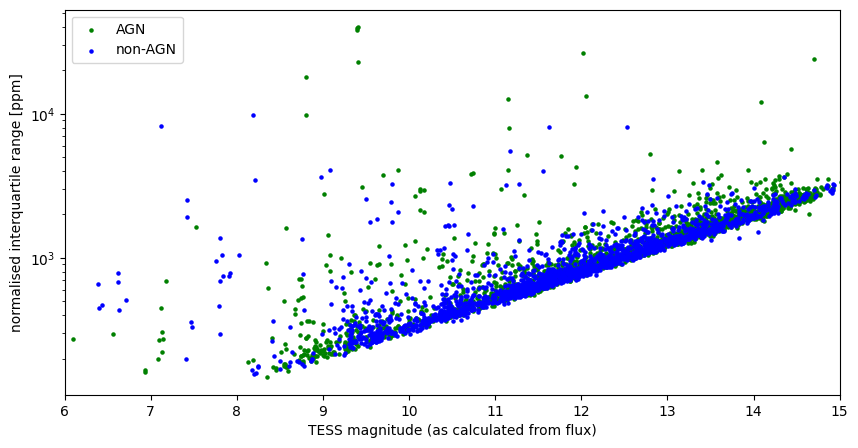

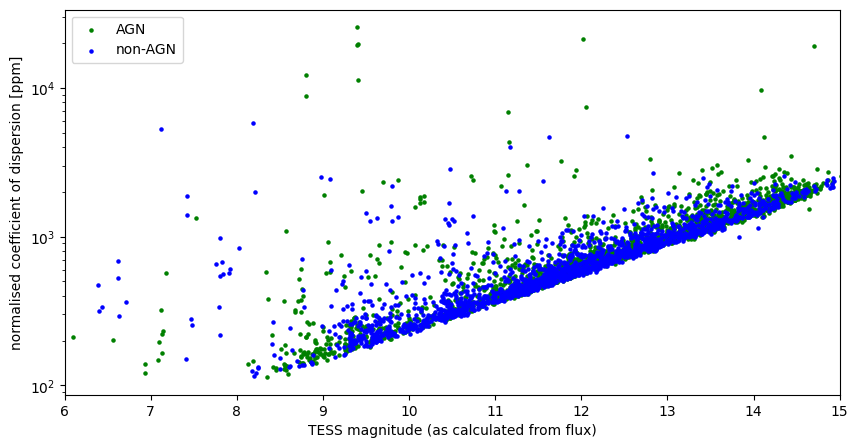

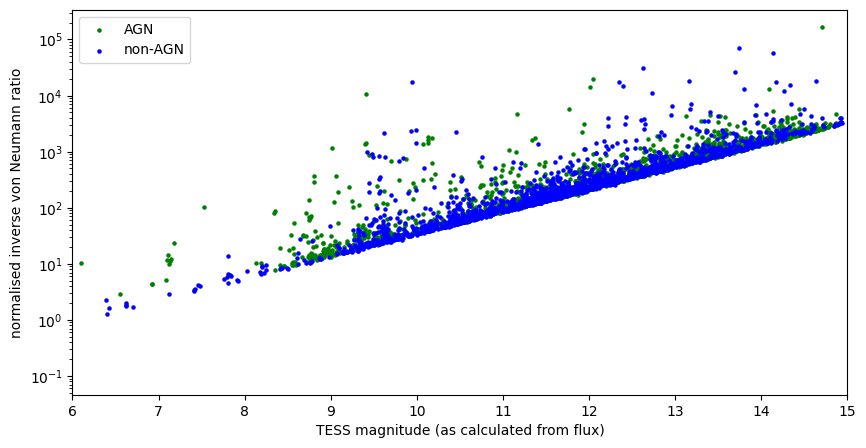

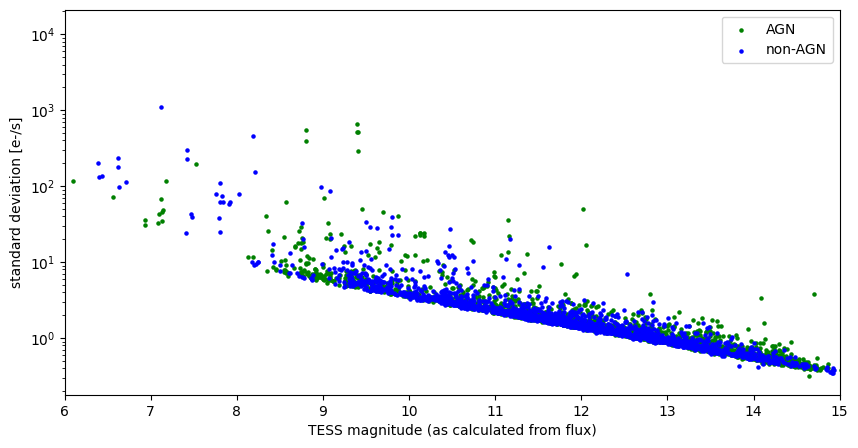

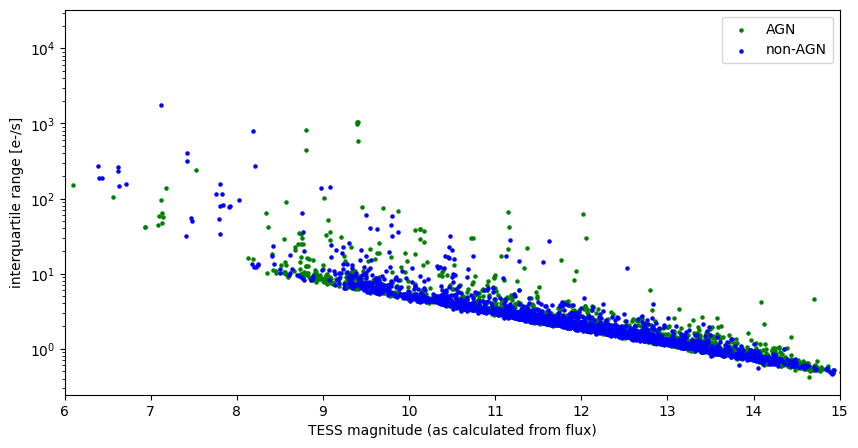

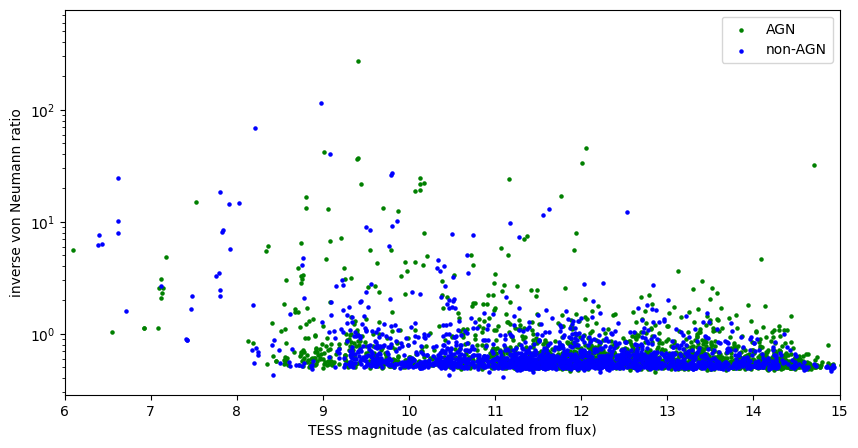

In [13]:
#from single text file
xaxis = mag
xaxis2 = mag2

yaxis = [i / q * 10**6 for i, q in zip(iqr, medianflux)]
yaxis2 = [i / q * 10**6 for i, q in zip(iqr2, medianflux2)]
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(xaxis, yaxis, color="g", s=20, marker='.', label='AGN')
ax.scatter(xaxis2, yaxis2, color="b", s=20, marker='.', label='non-AGN')
ax.set_yscale('log')
ax.set_xlabel('TESS magnitude (as calculated from flux)')
ax.set_ylabel('normalised interquartile range [ppm]')
ax.set_xlim(6,15)
ax.legend()
plt.show()

yaxis = cod
yaxis2 = cod2
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(xaxis, yaxis, color="g", s=20, marker='.', label='AGN')
ax.scatter(xaxis2, yaxis2, color="b", s=20, marker='.', label='non-AGN')
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('TESS magnitude (as calculated from flux)')
ax.set_ylabel('normalised coefficient of dispersion [ppm]')
ax.set_xlim(6,15)
ax.legend()
plt.show()

yaxis = [i / q * 10**6 for i, q in zip(oneovereta, medianflux)]
yaxis2 = [i / q * 10**6 for i, q in zip(oneovereta, medianflux2)]
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(xaxis, yaxis, color="g", s=20, marker='.', label='AGN')
ax.scatter(xaxis2, yaxis2, color="b", s=20, marker='.', label='non-AGN')
ax.set_yscale('log')
ax.set_xlabel('TESS magnitude (as calculated from flux)')
ax.set_ylabel('normalised inverse von Neumann ratio')
ax.set_xlim(6,15)
ax.legend()
plt.show()

yaxis = std
yaxis2 = std2
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(xaxis, yaxis, color="g", s=20, marker='.', label='AGN')
ax.scatter(xaxis2, yaxis2, color="b", s=20, marker='.', label='non-AGN')
ax.set_yscale('log')
ax.set_xlabel('TESS magnitude (as calculated from flux)')
ax.set_ylabel('standard deviation [e-/s]')
ax.set_xlim(6,15)
ax.legend()
plt.show()

yaxis = iqr
yaxis2 = iqr2
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(xaxis, yaxis, color="g", s=20, marker='.', label='AGN')
ax.scatter(xaxis2, yaxis2, color="b", s=20, marker='.', label='non-AGN')
ax.set_yscale('log')
ax.set_xlabel('TESS magnitude (as calculated from flux)')
ax.set_ylabel('interquartile range [e-/s]')
ax.set_xlim(6,15)
ax.legend()
plt.show()

yaxis = oneovereta
yaxis2 = oneovereta2
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(xaxis, yaxis, color="g", s=20, marker='.', label='AGN')
ax.scatter(xaxis2, yaxis2, color="b", s=20, marker='.', label='non-AGN')
ax.set_yscale('log')
ax.set_xlabel('TESS magnitude (as calculated from flux)')
ax.set_ylabel('inverse von Neumann ratio')
ax.set_xlim(6,15)
ax.legend()
plt.show()

In [25]:
import pandas as pd
data = {
    "": ["AGN mean", "AGN median", "non-AGN mean", "non-AGN median"],
    "std": [np.mean(std), np.median(std), np.mean(std2), np.median(std2)],
    "cod": [np.mean(cod), np.median(cod), np.mean(cod2), np.median(cod2)],
    "mad": [np.mean(mad), np.median(mad), np.mean(mad2), np.median(mad2)],
    "normalised mad": [np.mean([x/y*10**6 for x,y in zip(mad,medianflux)]), np.median([x/y*10**6 for x,y in zip(mad,medianflux)]), np.mean([x/y*10**6 for x,y in zip(mad2,medianflux2)]), np.median([x/y*10**6 for x,y in zip(mad2,medianflux2)])],
    "iqr": [np.mean(iqr), np.median(iqr), np.mean(iqr2), np.median(iqr2)],
    "normalised iqr": [np.mean([x/y*10**6 for x,y in zip(iqr,medianflux)]), np.median([x/y*10**6 for x,y in zip(iqr,medianflux)]), np.mean([x/y*10**6 for x,y in zip(iqr2,medianflux2)]), np.median([x/y*10**6 for x,y in zip(iqr2,medianflux2)])],
    "one over eta": [np.mean(oneovereta), np.median(oneovereta), np.mean(oneovereta2), np.median(oneovereta2)],
    "normalised 1/eta": [np.mean([x/y*10**6 for x,y in zip(oneovereta,medianflux)]), np.median([x/y*10**6 for x,y in zip(oneovereta,medianflux)]), np.mean([x/y*10**6 for x,y in zip(oneovereta2,medianflux2)]), np.median([x/y*10**6 for x,y in zip(oneovereta2,medianflux2)])]
}
df = pd.DataFrame(data)
print(df)

                         std          cod        mad  normalised mad  \
0        AGN mean   5.579873  1035.475038   4.058945      697.534405   
1      AGN median   1.397508   812.914791   0.921772      538.851764   
2    non-AGN mean  22.832729   763.400954  17.402548      511.091122   
3  non-AGN median   1.749973   605.183148   1.160793      399.592826   

         iqr  normalised iqr  one over eta  normalised 1/eta  
0   8.051888     1401.809626      1.167526        842.506472  
1   1.842439     1081.213674      0.575496        380.792112  
2  35.422313     1025.017205      1.329094        445.705984  
3   2.330432      800.905705      0.569580        206.834134  


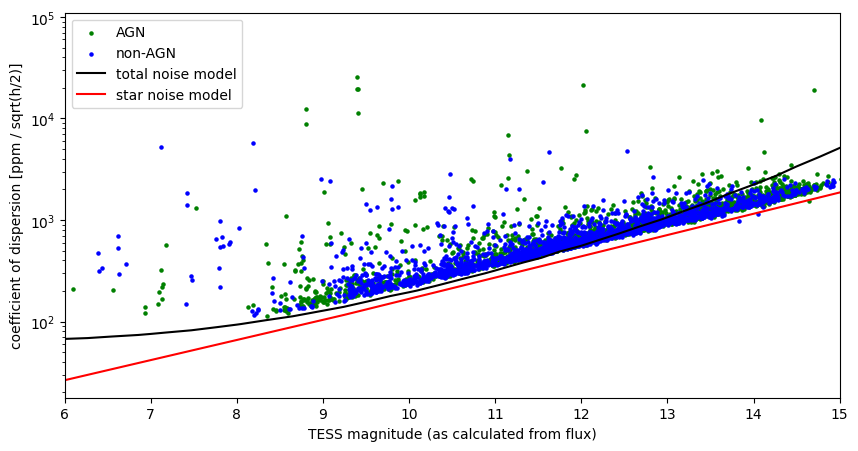

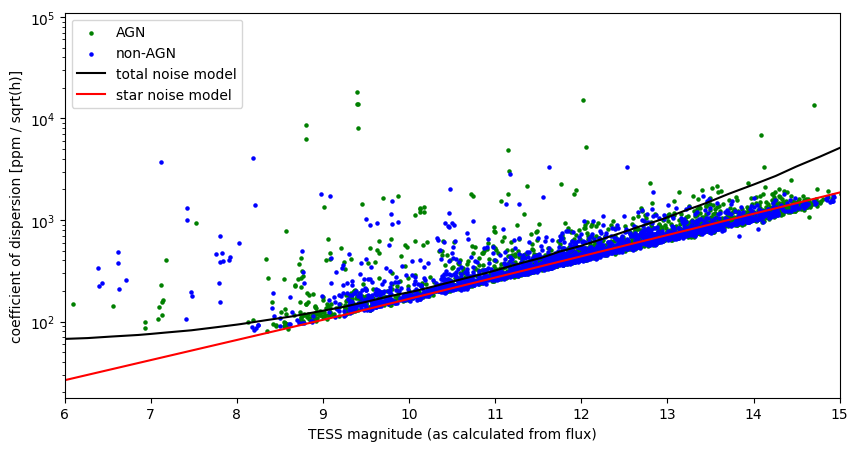

In [20]:
xaxis = mag
xaxis2 = mag2
yaxis = cod
yaxis2 = cod2
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(xaxis, yaxis, color="g", s=20, marker='.', label='AGN')
ax.scatter(xaxis2, yaxis2, color="b", s=20, marker='.', label='non-AGN')
plt.plot(noise_x, noise_y, marker='', linestyle='-', color='k', label='total noise model')
plt.plot(starnoise_x, starnoise_y, marker='', linestyle='-', color='r', label='star noise model')
ax.set_yscale('log')
ax.set_xlabel('TESS magnitude (as calculated from flux)')
ax.set_ylabel('coefficient of dispersion [ppm / sqrt(h/2)]')
ax.set_xlim(6,15)
ax.legend()
plt.show()

yaxis = [x / np.sqrt(2) for x in cod]
yaxis2 = [x / np.sqrt(2) for x in cod2]
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(xaxis, yaxis, color="g", s=20, marker='.', label='AGN')
ax.scatter(xaxis2, yaxis2, color="b", s=20, marker='.', label='non-AGN')
plt.plot(noise_x, noise_y, marker='', linestyle='-', color='k', label='total noise model')
plt.plot(starnoise_x, starnoise_y, marker='', linestyle='-', color='r', label='star noise model')
ax.set_yscale('log')
ax.set_xlabel('TESS magnitude (as calculated from flux)')
ax.set_ylabel('coefficient of dispersion [ppm / sqrt(h)]')
ax.set_xlim(6,15)
ax.legend()
plt.show()

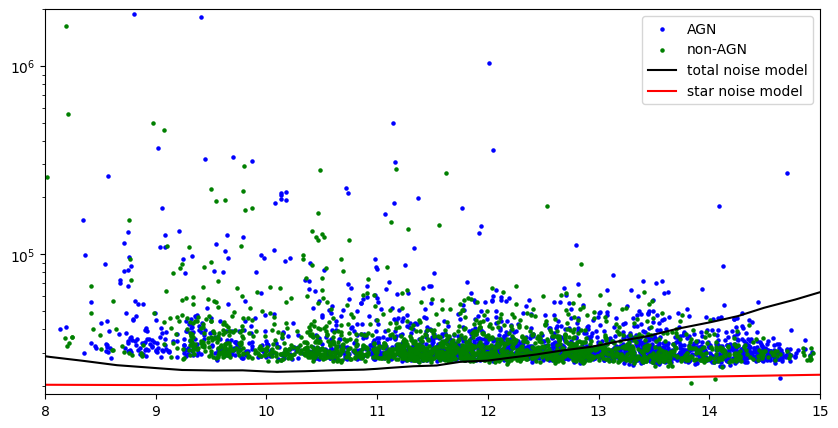

In [44]:
xaxis = mag
yaxis = [x * np.sqrt(y) for x,y in zip(cod,meanflux)]
#yaxis2 = [x * np.sqrt(y) for x,y in zip(cod2,meanflux2)]
rel_noise_y = [x * np.sqrt(10**((20.44-y)/2.5)) for x,y in zip(noise_y,noise_x)]
rel_starnoise_y = [x * np.sqrt(10**((20.44-y)/2.5)) for x,y in zip(starnoise_y,starnoise_x)]
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(xaxis2, yaxis2, color="b", s=20, marker='.', label='AGN')
ax.scatter(xaxis, yaxis, color="g", s=20, marker='.', label='non-AGN')
plt.plot(noise_x, rel_noise_y, marker='', linestyle='-', color='k', label='total noise model')
plt.plot(starnoise_x, rel_starnoise_y, marker='', linestyle='-', color='r', label='star noise model')
ax.set_yscale('log')
ax.set_xlim(8,15)
ax.set_ylim(18000,2000000)
plt.legend()
plt.show()

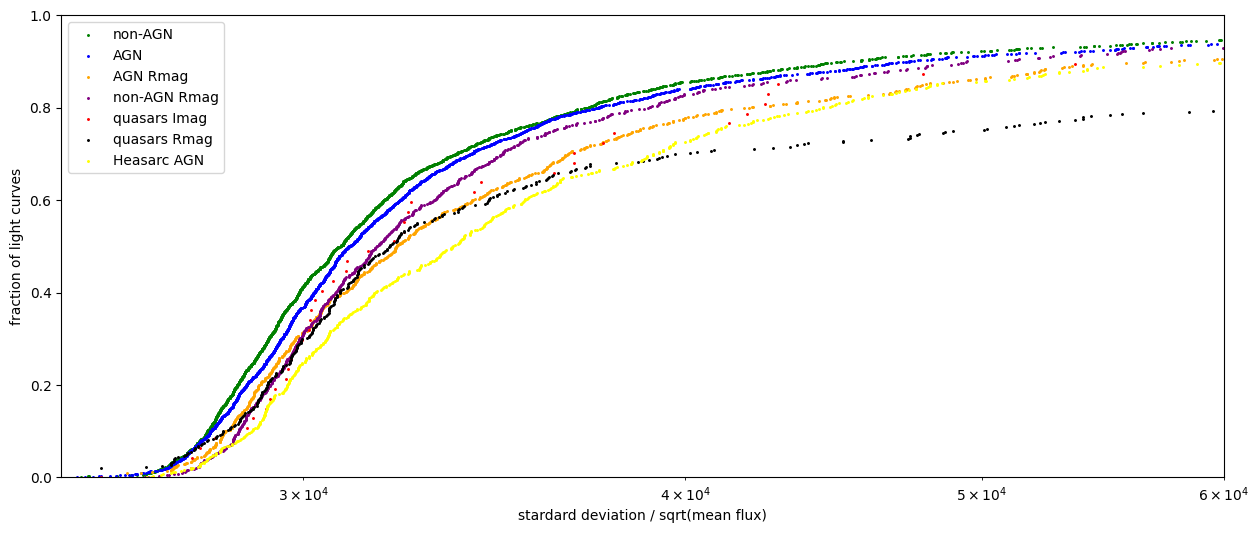

In [61]:
"""
yaxis = [x * np.sqrt(y) for x,y in zip(cod,meanflux)]
yaxis2 = [x * np.sqrt(y) for x,y in zip(cod2,meanflux2)]
fractions = [(np.sum(yaxis < y_val) / len(yaxis)) for y_val in yaxis]
fractions2 = [(np.sum(yaxis2 < y_val) / len(yaxis2)) for y_val in yaxis2]"""
yaxis7 = [x * np.sqrt(y) for x,y in zip(cod,meanflux)]
yaxisnow = yaxis7
fractions7 = [(np.sum(yaxisnow < y_val) / len(yaxisnow)) for y_val in yaxisnow]

fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(yaxis1, fractions1, color="g", s=5, marker='.', label='non-AGN')
ax.scatter(yaxis2, fractions2, color="b", s=5, marker='.', label='AGN')
ax.scatter(yaxis5, fractions5, color="orange", s=5, marker='.', label='AGN Rmag')
ax.scatter(yaxis6, fractions6, color="purple", s=5, marker='.', label='non-AGN Rmag')
#ax.scatter(yaxis3, fractions3, color="r", s=5, marker='.', label='quasars Imag')
ax.scatter(yaxis4, fractions4, color="k", s=5, marker='.', label='quasars Rmag')
ax.scatter(yaxis7, fractions7, color="yellow", s=5, marker='.', label='Heasarc AGN')
ax.legend()
ax.set_ylim(0,1)
ax.set_xlim(25000,60000)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('stardard deviation / sqrt(mean flux)')
ax.set_ylabel('fraction of light curves')
plt.show()

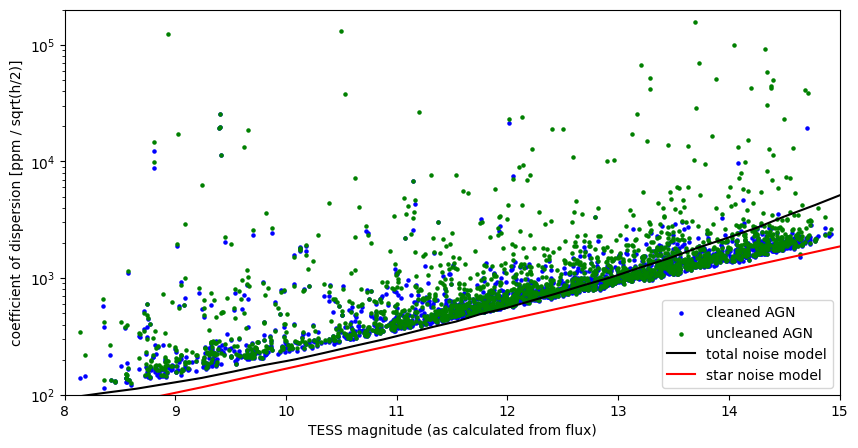

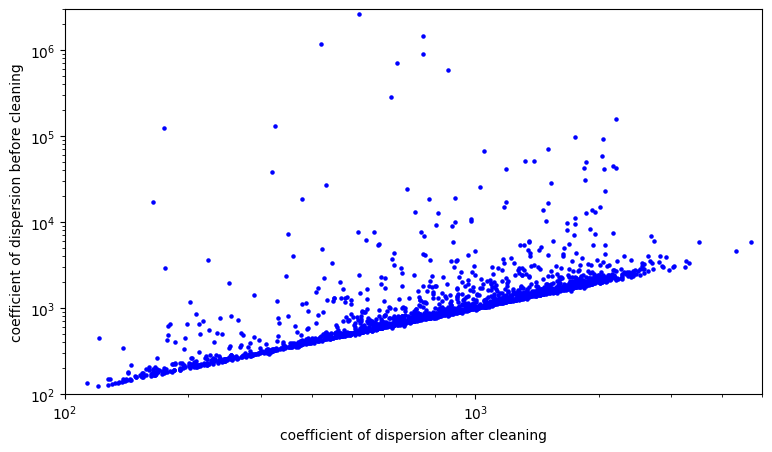

In [19]:
xaxis = mag
yaxis = cod
xaxis2 = mag2
yaxis2 = cod2
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(xaxis2, yaxis2, color="b", s=20, marker='.', label='cleaned AGN')
ax.scatter(xaxis, yaxis, color="g", s=20, marker='.', label='uncleaned AGN')
plt.plot(noise_x, noise_y, marker='', linestyle='-', color='k', label='total noise model')
plt.plot(starnoise_x, starnoise_y, marker='', linestyle='-', color='r', label='star noise model')
ax.set_xlabel('TESS magnitude (as calculated from flux)')
ax.set_ylabel('coefficient of dispersion [ppm / sqrt(h/2)]')
ax.set_yscale('log')
ax.set_xlim(8,15)
ax.set_ylim(100,200000)
plt.legend()
plt.show()

xaxis = cod2
yaxis = cod
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(xaxis, yaxis, color="b", s=20, marker='.')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(100,5000)
ax.set_ylim(100,3000000)
ax.set_xlabel('coefficient of dispersion after cleaning')
ax.set_ylabel('coefficient of dispersion before cleaning')
plt.show()

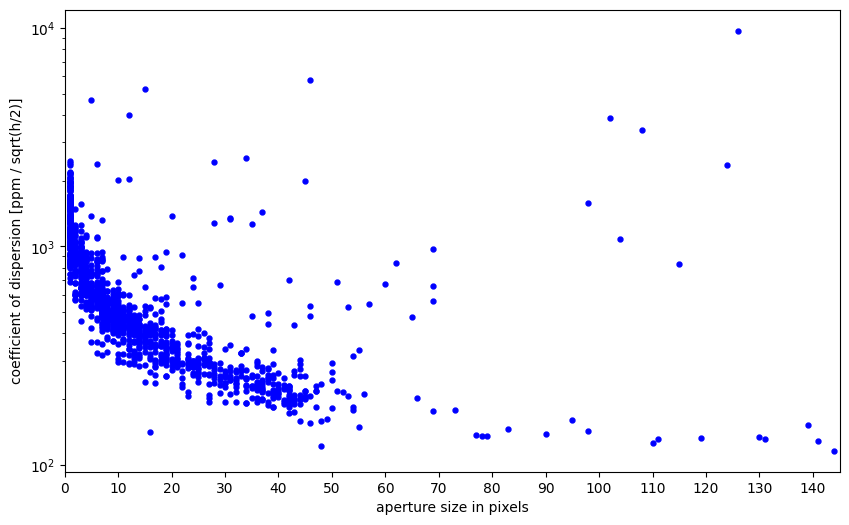

In [98]:
#from single text file

xaxis = aperture
yaxis = cod_norm

"""fig, ax = plt.subplots(figsize=(8,5))
m, b = np.polyfit(xaxis, yaxis, 1)
x_reg = np.linspace(min(xaxis), max(xaxis), 500)
y_reg = m * x_reg + b
plt.plot(x_reg, y_reg, color='r') #"""

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(xaxis, yaxis, color="b", s=50, marker='.')
#ax.set_xscale('log')
ax.set_yscale('log')
"""locs, _ = plt.xticks()
low = ax.get_xlim()[0]
plt.xticks(np.arange(int(min(locs)), int(max(locs))+1, 1)) #"""
ax.set_xlim(0, max(xaxis)+1)
plt.xticks(np.arange(0, max(xaxis), 10))
#ax.set_xlabel('TESS magnitude (as calculated from flux)')
#ax.set_xlabel('ratio of absorption corrected flux to oberved flux')
ax.set_xlabel('aperture size in pixels')
ax.set_ylabel('coefficient of dispersion [ppm / sqrt(h/2)]')
#ax.set_ylabel('coefficient of dispersion [ppm / $\sqrt{h/2}$]')
#ax.set_ylabel('median distance from median [e-/s]')
#plt.savefig('.png')
ax.set_title('')
plt.show()

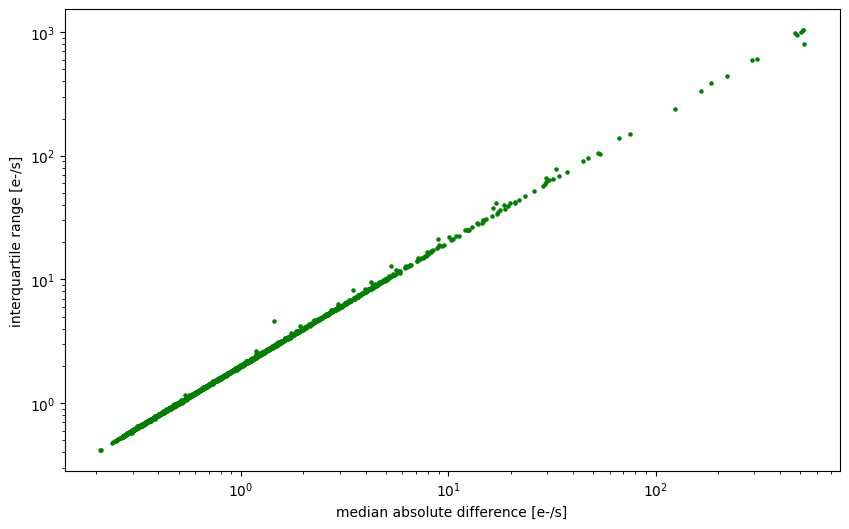

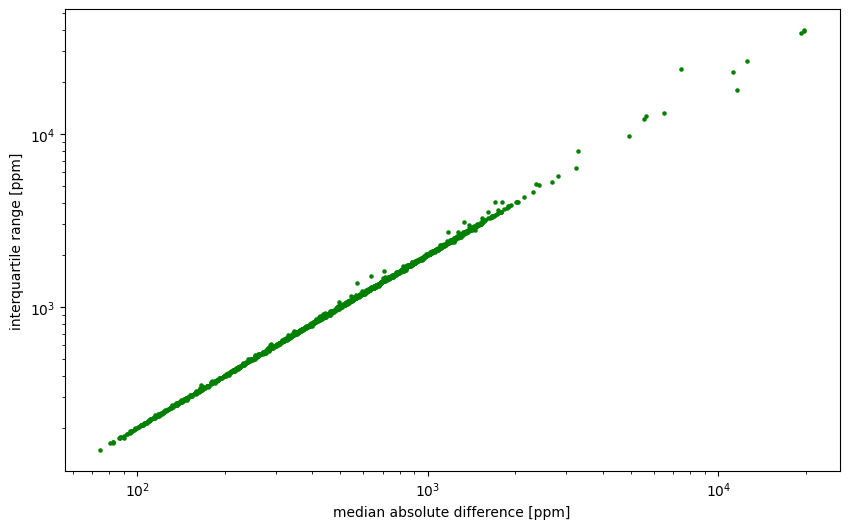

In [14]:
xaxis = mad
yaxis = iqr
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(xaxis, yaxis, color="g", s=20, marker='.')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim(0, max(xaxis)+1)
#plt.xticks(np.arange(0, max(xaxis), 10))
ax.set_xlabel('median absolute difference [e-/s]')
ax.set_ylabel('interquartile range [e-/s]')
plt.show()

xaxis = [i / q * 10**6 for i, q in zip(mad, medianflux)]
yaxis = [i / q * 10**6 for i, q in zip(iqr, medianflux)]
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(xaxis, yaxis, color="g", s=20, marker='.')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim(0, max(xaxis)+1)
#plt.xticks(np.arange(0, max(xaxis), 10))
ax.set_xlabel('median absolute difference [ppm]')
ax.set_ylabel('interquartile range [ppm]')
plt.show()

correlation = np.corrcoef(xaxis,yaxis)[0,1]
print(correlation)

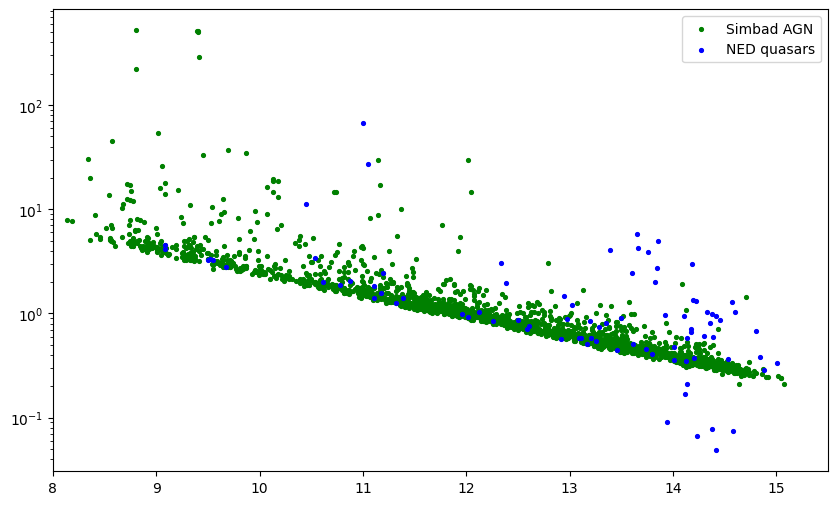

In [46]:
#from two text files on same axis

xaxis1 = mag
yaxis1 = mad
xaxis2 = mag2
yaxis2 = mad2
#yaxis2 = [y / np.sqrt(2) for y in cod_norm2]
#yaxis1 = [x / np.sqrt(2) for x in cod_norm]

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(xaxis1, yaxis1, color="g", s=30, marker='.', label="Simbad AGN")
ax.scatter(xaxis2, yaxis2, color="b", s=30, marker='.', label="NED quasars")
#plt.plot(noise_x, noise_y, marker='', linestyle='-', color='k')
#plt.plot(starnoise_x, starnoise_y, marker='', linestyle='-', color='r')
#ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim(0.25,1000)
"""locs, _ = plt.xticks()
low = ax.get_xlim()[0]
plt.xticks(np.arange(int(min(locs)), int(max(locs))+1, 1)) #"""
ax.set_xlim(8, 15.5) 
#ax.set_xlabel('Simbad magnitude')
#ax.set_ylabel('coefficient of dispersion [ppm / sqrt(h/2)]')
#ax.set_ylabel('median distance from median [e-/s]')
ax.legend()
#plt.savefig('.png')
#ax.set_title('for cod per sqrt(h)')
plt.show()

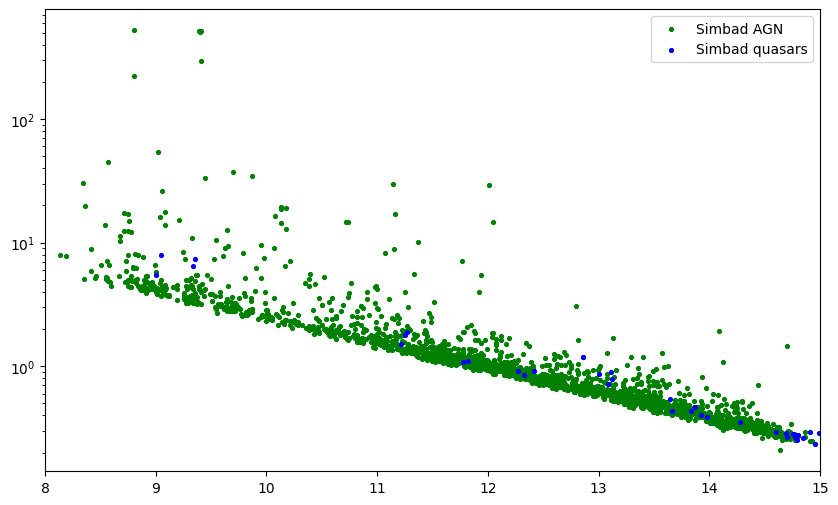

In [28]:
#from two text files on same axis

xaxis1 = mag
yaxis1 = mad
xaxis2 = mag2
yaxis2 = mad2

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(xaxis1, yaxis1, color="g", s=30, marker='.', label="Simbad AGN")
ax.scatter(xaxis2, yaxis2, color="b", s=30, marker='.', label="Simbad quasars")
ax.set_yscale('log')
ax.set_xlim(8, 15) 
ax.legend()
plt.show()

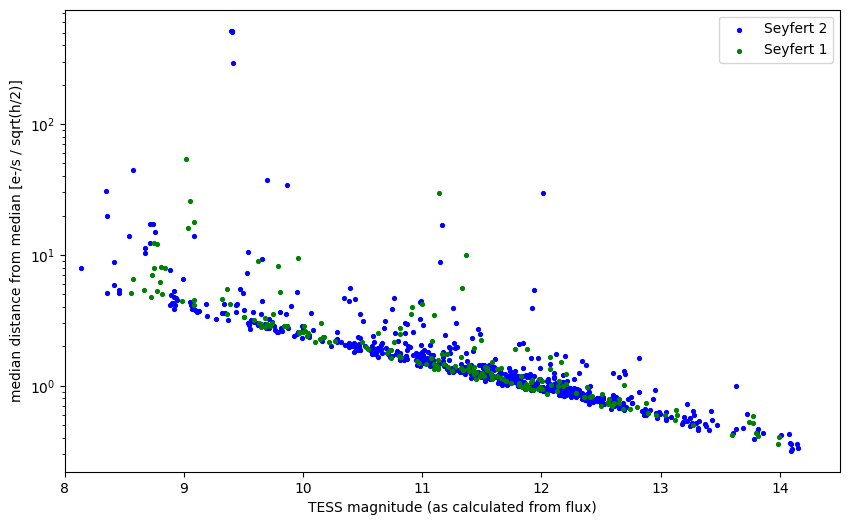

		Seyfert 1		Seyfert 2
mean cod:	 629.6869709762459 	 779.6338841515375
median cod:	 523.7538182230718 	 569.9553562089887
mean mdfm:	 3.159171795811506 	 7.4364376667912335
median mdfm:	 1.4623340008647574 	 1.2616877767004553


In [47]:
xaxis1 = magSy1
xaxis2 = magSy2
yaxis1 = mdfmSy1
yaxis2 = mdfmSy2

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(xaxis2, yaxis2, color="b", s=30, marker='.', label="Seyfert 2")
ax.scatter(xaxis1, yaxis1, color="g", s=30, marker='.', label="Seyfert 1")
ax.set_yscale('log')
#ax.set_ylim(0.25,1000)
locs, _ = plt.xticks()
low = ax.get_xlim()[0]
plt.xticks(np.arange(int(min(locs)), int(max(locs))+1, 1))
ax.set_xlim(8, 14.5) #"""
ax.set_xlabel('TESS magnitude (as calculated from flux)')
#ax.set_ylabel('coefficient of dispersion [ppm]')
ax.set_ylabel('median distance from median [e-/s / sqrt(h/2)]')
ax.legend()
plt.show()

print('\t\tSeyfert 1\t\tSeyfert 2')
print('mean cod:\t',np.mean(codSy1),'\t',np.mean(codSy2))
print('median cod:\t',np.median(codSy1),'\t',np.median(codSy2))
print('mean mdfm:\t',np.mean(mdfmSy1),'\t',np.mean(mdfmSy2))
print('median mdfm:\t',np.median(mdfmSy1),'\t',np.median(mdfmSy2))

In [ ]:
xaxis1 = cod_norm1
xaxis2 = 

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(xaxis2, yaxis2, color="b", s=30, marker='.', label="Seyfert 2")
ax.set_yscale('log')
#ax.set_ylim(0.25,1000)
locs, _ = plt.xticks()
low = ax.get_xlim()[0]
plt.xticks(np.arange(int(min(locs)), int(max(locs))+1, 1))
ax.set_xlim(8, 14.5) #"""
ax.set_xlabel('TESS magnitude (as calculated from flux)')
#ax.set_ylabel('coefficient of dispersion [ppm]')
ax.set_ylabel('median distance from median [e-/s / sqrt(h/2)]')
ax.legend()
plt.show()

print('\t\tSeyfert 1\t\tSeyfert 2')
print('mean cod:\t',np.mean(codSy1),'\t',np.mean(codSy2))
print('median cod:\t',np.median(codSy1),'\t',np.median(codSy2))
print('mean mdfm:\t',np.mean(mdfmSy1),'\t',np.mean(mdfmSy2))
print('median mdfm:\t',np.median(mdfmSy1),'\t',np.median(mdfmSy2))

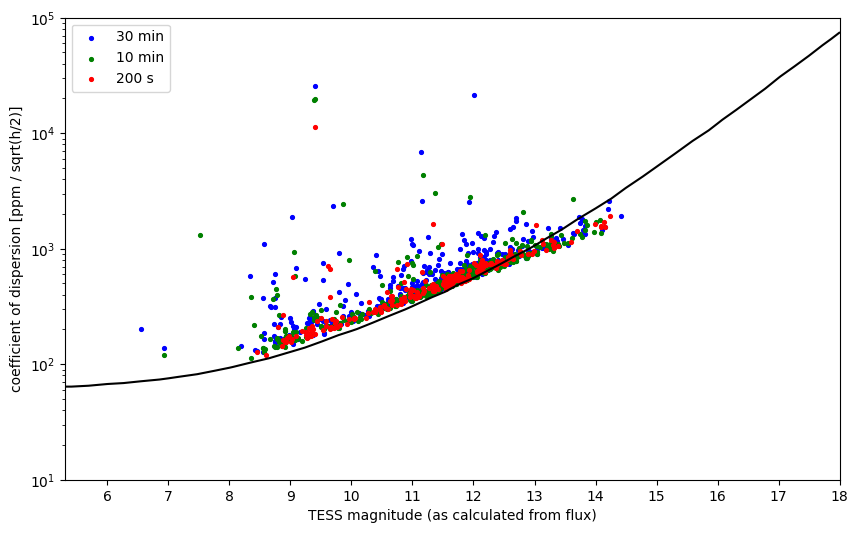

		30 min			10 min			200 s
mean cod:	 792.5820483331229 	 693.234066410317 	 593.7992738720061
median cod:	 582.5898972283101 	 527.4949053219611 	 503.27977763567185
mean mdfm:	 6.639788360139077 	 6.020323636570463 	 3.8823602899512544
median mdfm:	 1.4557659273384616 	 1.2700088143328223 	 1.2956705974324905


In [43]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(mag_1, cod_1x, color="b", s=30, marker='.', label="30 min")
ax.scatter(mag_2, cod_2x, color="g", s=30, marker='.', label="10 min")
ax.scatter(mag_3, cod_3x, color="r", s=30, marker='.', label="200 s")
plt.plot(noise_x, noise_y, marker='', linestyle='-', color='k')
ax.set_yscale('log')
locs, _ = plt.xticks()
low = ax.get_xlim()[0]
plt.xticks(np.arange(int(min(locs)), int(max(locs))+1, 1))
ax.set_xlim(5.3, 18) #"""
ax.set_ylim(10,100000)
ax.set_xlabel('TESS magnitude (as calculated from flux)')
ax.set_ylabel('coefficient of dispersion [ppm / sqrt(h/2)]')
#ax.set_ylabel('median distance from median [e-/s]')
ax.legend()
plt.show()

print('\t\t30 min\t\t\t10 min\t\t\t200 s')
print('mean cod:\t',np.mean(cod_1),'\t',np.mean(cod_2x),'\t',np.mean(cod_3x))
print('median cod:\t',np.median(cod_1),'\t',np.median(cod_2x),'\t',np.median(cod_3x))
print('mean mdfm:\t',np.mean(mdfm_1),'\t',np.mean(mdfm_2x),'\t',np.mean(mdfm_3x))
print('median mdfm:\t',np.median(mdfm_1),'\t',np.median(mdfm_2x),'\t',np.median(mdfm_3x))

In [5]:
#from two text files against each other
param = 2 #change column to select data

galaxies2 = [i.replace(" ","") for i in galaxies2]
table1 = [galaxies, sectors, meanflux, std, cod, mdfm, mag]
table2 = [galaxies2, sectors2, meanflux2, std2, cod2, mdfm2, mag2]
flat_list1 = [item for sublist in table1 for item in sublist]
columns1 = []
for i in range(len(table1[0])):
    column = [sublist[i] for sublist in table1]
    columns1.append(column)
flat_list2 = [item for sublist in table2 for item in sublist]
columns2 = []
for i in range(len(table2[0])):
    column = [sublist[i] for sublist in table2]
    columns2.append(column)
mapping1 = {(row[0], row[1]): row[param] for row in columns1}
mapping2 = {(row[0], row[1]): row[param] for row in columns2}
common_keys = set(mapping1.keys()) & set(mapping2.keys())
quaver = [mapping1[key] for key in common_keys]
elk = [mapping2[key] for key in common_keys] #"""

fig, ax = plt.subplots(figsize=(10,6))
"""m, b = np.polyfit(quaver, elk, 1)
x_reg = np.linspace(min(quaver), max(quaver), 500)
y_reg = m * x_reg + b
plt.plot(x_reg, y_reg, color='r') #"""

ax.scatter(quaver, elk, color="g", s=30, marker='.')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim(0.25,1000)
ax.set_xlabel('aperture extraction')
ax.set_ylabel('Simbad diameter')
"""locs, _ = plt.xticks()
low = ax.get_xlim()[0]
plt.xticks(np.arange(int(min(locs)), int(max(locs))+1, 1))
ax.set_xlim(6.5, 14.5) #"""
#plt.savefig('.png')
plt.show()

NameError: name 'std' is not defined

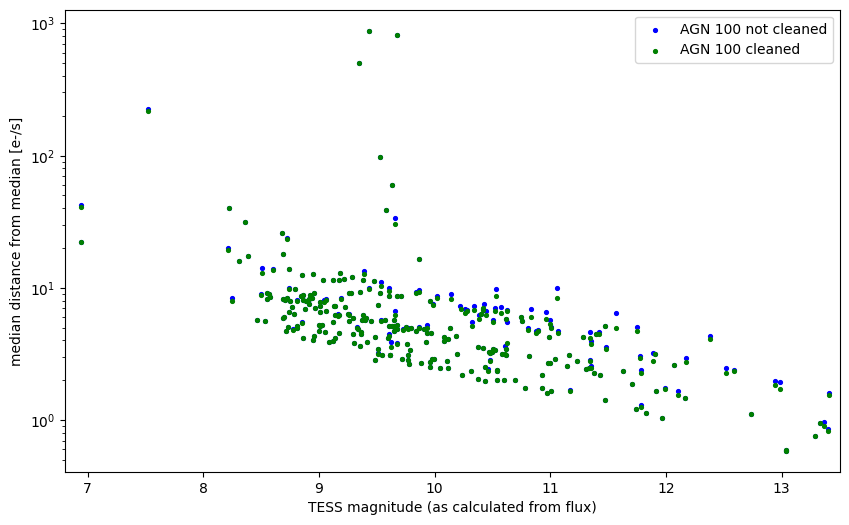

In [65]:
#extra plot
xaxis1 = mag
yaxis1 = mdfm
xaxis2 = mag2
yaxis2 = mdfm2

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(xaxis2, yaxis2, color="b", s=30, marker='.', label="AGN 100 not cleaned")
ax.scatter(xaxis1, yaxis1, color="g", s=30, marker='.', label="AGN 100 cleaned")
#ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim(0.25,30)
locs, _ = plt.xticks()
low = ax.get_xlim()[0]
plt.xticks(np.arange(int(min(locs)), int(max(locs))+1, 1))
ax.set_xlim(6.8, 13.5) #"""
ax.set_xlabel('TESS magnitude (as calculated from flux)')
#ax.set_ylabel('coefficient of dispersion [ppm]')
ax.set_ylabel('median distance from median [e-/s]')
ax.legend()
plt.show()

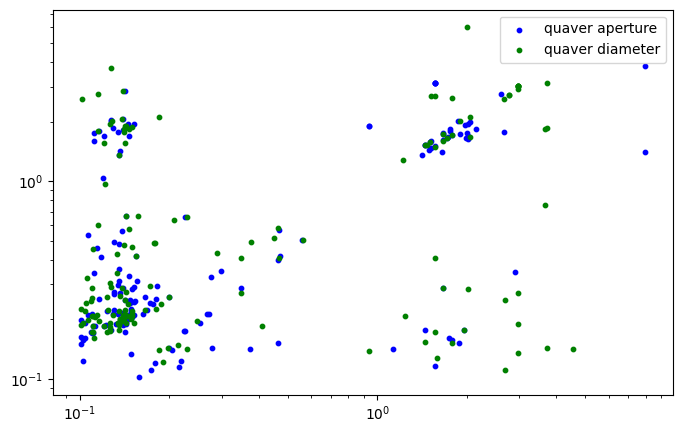

In [33]:
#plot biggest vs second-biggest periodogram peak for GCs to find potential systematic effects
quaver_1 = [0.130687023, 7.939617845, 7.939617845, 0.147345431, 0.136858742, 0.223201647, 0.219119669, 0.225271064, 0.140700809, 0.144650734, 0.180514888, 0.297129582, 0.151481892, 0.136858742, 0.129486487, 1.970557802, 2.007267304, 1.453197524, 1.453197524, 1.453197524, 1.413515585, 0.147345431, 0.143321923, 0.199802631, 0.225271064, 0.143321923, 0.130687023, 0.152886359, 0.139408283, 2.672106155, 1.763977275, 2.599139918, 0.130687023, 0.13812763, 1.780332016, 0.155734477, 0.110684849, 0.147345431, 0.135601511, 0.125950646, 0.135601511, 0.941776601, 0.941776601, 1.881694425, 1.952455581, 0.129486487, 1.715808986, 1.763977275, 1.899140582, 0.134355829, 0.115911962, 0.139408283, 1.564547589, 1.564547589, 1.564547589, 1.564547589, 1.564547589, 0.203524752, 0.142005318, 0.173972643, 0.462733201, 0.471353453, 0.111711065, 0.113792129, 0.467023439, 0.139408283, 0.135601511, 0.462733201, 0.374236629, 0.102807322, 0.100927151, 0.118071285, 0.151481892, 0.144650734, 0.13812763, 0.139408283, 0.13189869, 0.130687023, 0.163089068, 1.521825053, 1.507845046, 1.521825053, 0.111711065, 1.493993464, 0.145991865, 1.731717134, 1.653624407, 1.66895601, 0.347601918, 0.102807322, 1.564547589, 0.143321923, 0.154303847, 2.903526885, 0.148711546, 0.10966806, 2.141220155, 0.151481892, 0.166127252, 0.142005318, 0.103760502, 0.148711546, 1.66895601, 0.142005318, 0.110684849, 0.13812763, 0.115911962, 0.120270833, 0.167667503, 0.148711546, 0.150090328, 0.123647224, 0.182188534, 0.100927151, 0.1271184, 0.108660611, 0.1271184, 0.1271184, 2.025877712, 0.175585633, 0.178856616, 0.106673394, 0.100927151, 0.215112343, 0.270935387, 0.148711546, 0.151481892, 0.134355829, 0.199802631, 0.145991865, 0.556533078, 0.13812763, 0.278541416, 0.145991865, 0.120270833, 0.134355829, 0.275982639, 0.158635653, 0.119165984, 0.139408283, 2.025877712, 2.025877712, 0.10966806, 0.106673394, 2.044660667, 1.988827857, 0.103760502, 1.864408534, 1.780332016, 0.268446481, 0.150090328, 0.122511358, 0.148711546, 0.172374471, 0.112746796, 0.253985907, 1.66895601, 0.111711065, 1.66895601, 1.747772774, 0.135601511, 1.132682567]
quaver_2 = [0.49361321, 3.829713914, 1.400530545, 0.242532274, 1.426621015, 0.173972643, 0.123647224, 0.173972643, 0.190792422, 0.199802631, 0.253985907, 0.350824714, 0.291695588, 0.270935387, 0.213136247, 1.916748492, 1.747772774, 0.175585633, 1.521825053, 1.521825053, 1.34977233, 0.213136247, 0.189039738, 0.258717408, 0.657105755, 0.194346693, 0.268446481, 0.247050406, 1.813497804, 1.780332016, 1.830311676, 2.747120789, 0.275982639, 0.215112343, 0.157178372, 0.314046522, 0.17079098, 0.249340937, 0.311161583, 0.177213578, 1.362286764, 1.899140582, 1.899140582, 0.151481892, 0.177213578, 1.864408534, 1.653624407, 1.796838391, 1.731717134, 1.780332016, 1.796838391, 2.063617768, 3.126007243, 3.126007243, 0.115911962, 3.126007243, 3.126007243, 0.139408283, 0.172374471, 0.110684849, 0.399210913, 0.418063724, 0.344408728, 0.458482375, 0.566900727, 0.289015972, 0.480134292, 0.151481892, 0.142005318, 0.122511358, 0.197967175, 0.414223247, 1.952455581, 1.952455581, 0.197967175, 0.196148581, 0.189039738, 0.223201647, 0.213136247, 1.59369353, 1.579053314, 1.466670866, 1.59369353, 1.439847953, 0.205411735, 1.66895601, 1.400530545, 1.608469483, 0.289015972, 0.157178372, 1.507845046, 0.669346971, 0.418063724, 0.347601918, 0.211178304, 0.213136247, 1.847281437, 0.211178304, 0.258717408, 2.87685409, 0.190792422, 0.213136247, 0.289015972, 0.249340937, 0.185582523, 0.196148581, 0.253985907, 0.185582523, 0.223201647, 0.219119669, 0.205411735, 0.219119669, 0.294400048, 0.163089068, 0.175585633, 0.172374471, 2.044660667, 2.007267304, 1.638433646, 0.240304289, 0.120270833, 0.531435916, 0.150090328, 0.114847155, 0.213136247, 0.13312159, 0.244780916, 0.299884423, 0.143321923, 0.33192662, 0.502808725, 0.556533078, 0.143321923, 1.68442976, 1.68442976, 0.213136247, 0.328877429, 0.101862899, 1.032828126, 0.187303154, 1.952455581, 1.700046975, 0.17079098, 0.209238348, 1.988827857, 1.653624407, 0.160106446, 2.007267304, 1.715808986, 0.213136247, 0.283730362, 0.187303154, 0.225271064, 0.242532274, 0.185582523, 0.192561357, 1.747772774, 1.747772774, 1.731717134, 0.160106446, 0.357360225, 0.140700809]
quaverdiam_1 = [2.985038245, 2.985038245, 2.985038245, 2.985038245, 2.985038245, 2.985038245, 2.985038245, 2.985038245, 2.985038245, 3.725137301, 0.1271184, 2.77259076, 2.77259076, 1.466670866, 1.453197524, 1.453197524, 0.140700809, 0.213136247, 0.114847155, 0.106673394, 0.229467637, 0.450097513, 0.129486487, 2.696880626, 2.696880626, 2.672106155, 1.780332016, 0.101862899, 0.125950646, 0.135601511, 1.780332016, 0.41041805, 0.105693455, 0.144650734, 0.135601511, 0.125950646, 0.135601511, 0.941776601, 0.142005318, 0.150090328, 1.952455581, 0.125950646, 1.715808986, 0.140700809, 0.143321923, 0.10966806, 0.114847155, 0.13812763, 1.564547589, 0.120270833, 0.142005318, 1.564547589, 1.564547589, 0.207316213, 0.136858742, 0.187303154, 0.462733201, 0.467023439, 0.10966806, 0.110684849, 0.145991865, 0.13812763, 0.140700809, 0.150090328, 0.377706369, 0.125950646, 0.247050406, 0.180514888, 0.140700809, 0.145991865, 0.13812763, 0.136858742, 0.135601511, 0.124793621, 0.1271184, 1.59369353, 1.507845046, 1.521825053, 0.10966806, 0.148711546, 0.139408283, 0.134355829, 1.219473437, 0.347601918, 0.347601918, 0.104722519, 1.564547589, 0.143321923, 0.154303847, 0.123647224, 0.150090328, 0.135601511, 3.657010881, 3.657010881, 0.103760502, 0.139408283, 0.139408283, 0.139408283, 1.66895601, 0.142005318, 0.110684849, 0.13812763, 0.10966806, 0.120270833, 0.166127252, 0.150090328, 0.150090328, 0.123647224, 0.183877698, 0.157178372, 0.125950646, 0.102807322, 2.044660667, 0.12829698, 1.899140582, 0.178856616, 0.177213578, 0.110684849, 0.229467637, 0.13312159, 0.113792129, 0.172374471, 0.108660611, 4.563716282, 0.197967175, 0.134355829, 0.561692982, 0.144650734, 0.143321923, 0.112746796, 0.115911962, 0.139408283, 3.725137301, 3.725137301, 0.121385926, 0.183877698, 2.007267304, 2.025877712, 0.114847155, 0.110684849, 2.044660667, 0.151481892, 0.100927151, 0.143321923, 1.780332016, 1.242190995, 0.13312159, 0.289015972, 0.142005318, 0.100927151, 0.199802631, 0.136858742, 1.66895601, 0.142005318, 1.66895601, 0.190792422, 0.125950646, 0.111711065]
quaverdiam_2 = [3.040646493, 2.930446977, 3.040646493, 3.040646493, 3.040646493, 0.134355829, 3.040646493, 0.270935387, 0.189039738, 3.126007243, 3.725137301, 2.721884795, 2.721884795, 1.521825053, 0.152886359, 1.521825053, 0.199802631, 0.148711546, 0.599176967, 0.197967175, 0.657105755, 0.516924187, 0.209238348, 0.249340937, 0.110684849, 2.599139918, 2.623237882, 2.599139918, 0.305470967, 0.219119669, 0.151481892, 0.185582523, 0.32286282, 0.240304289, 0.187303154, 0.177213578, 1.362286764, 0.13812763, 1.899140582, 1.881694425, 0.175585633, 1.952455581, 1.653624407, 1.780332016, 1.899140582, 0.172374471, 1.796838391, 2.063617768, 2.696880626, 1.564547589, 1.564547589, 0.172374471, 1.493993464, 0.63329084, 0.263537052, 0.238096772, 0.577461515, 0.406647809, 0.207316213, 0.454270599, 0.572156756, 0.289015972, 0.475723614, 0.462733201, 0.49361321, 0.182188534, 0.196148581, 0.225271064, 1.830311676, 1.830311676, 0.201655104, 0.201655104, 0.189039738, 0.223201647, 0.291695588, 0.1271184, 1.579053314, 2.696880626, 0.289015972, 0.201655104, 0.203524752, 0.192561357, 1.277063301, 0.270935387, 0.406647809, 0.242532274, 0.41041805, 0.669346971, 0.418063724, 0.258717408, 0.213136247, 0.175585633, 1.847281437, 0.761664172, 0.22115124, 2.87685409, 0.197967175, 0.205411735, 0.289015972, 0.249340937, 0.185582523, 0.196148581, 0.256340741, 0.185582523, 0.223201647, 0.219119669, 0.207316213, 0.172374471, 2.121550171, 0.66319812, 0.173972643, 0.190792422, 1.66895601, 2.007267304, 2.025877712, 0.489078709, 0.489078709, 0.172374471, 0.142005318, 0.341244871, 0.209238348, 0.294400048, 0.247050406, 0.142005318, 0.143321923, 0.192561357, 0.502808725, 0.207316213, 0.275982639, 0.205411735, 0.196148581, 0.211178304, 1.864408534, 0.143321923, 0.968215306, 0.139408283, 6.019481974, 0.283730362, 2.747120789, 0.207316213, 2.102060883, 0.190792422, 0.187303154, 0.190792422, 1.715808986, 0.207316213, 0.425851829, 0.433785019, 0.223201647, 0.225271064, 0.258717408, 0.201655104, 1.59369353, 0.213136247, 1.731717134, 0.121385926, 0.192561357, 0.160106446]
elk_1 = []
elk_2 = []

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(quaver_1, quaver_2, color='b', label='quaver aperture', s=10)
ax.scatter(quaverdiam_1, quaverdiam_2, color='g', label='quaver diameter', s=10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.show()

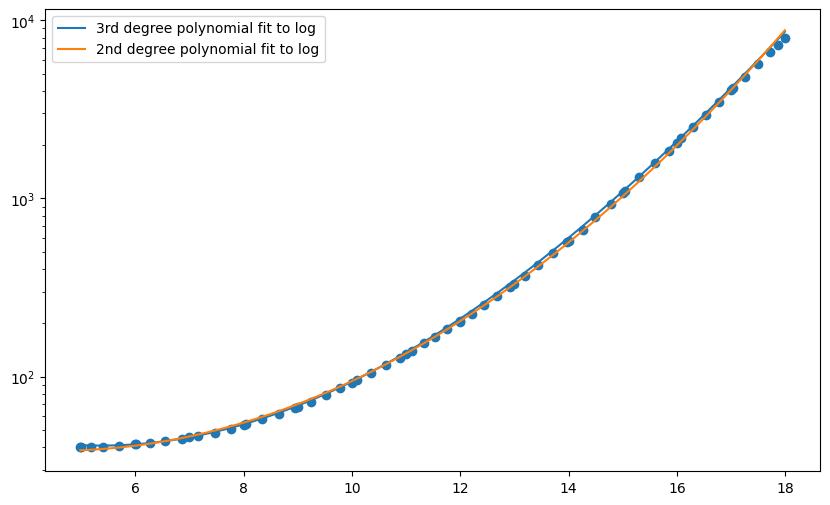

In [14]:
#noise model fit
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def exp_func(x, a, b,c):
    return a * np.exp(b * x) + c
def powerlaw_func(x, a, b, c):
    return a * np.power(x, b) + c
def linear_func(x, a, b):
    return a * x + b
def poly_func(x, coeffs):
    return sum([coeffs[i] * (x ** (len(coeffs) - i - 1)) for i in range(len(coeffs))])

coefficients_4 = [-0.00003, 0.00095, 0.00232, -0.07949, 1.84092]
coefficients_3 = [-0.00027, 0.02232, -0.21618, 2.17166]
coefficients_2 = [0.01298, -0.11703, 1.8471]
y_data_log = np.log(noise_)

params, cov = curve_fit(linear_func, noise_x, y_data_log)
exp_params, exp_cov = curve_fit(exp_func, noise_x, noise_y)
powerlaw_params, powerlaw_cov = curve_fit(powerlaw_func, noise_x, noise_y)
exp_params_log, exp_cov_log = curve_fit(exp_func, noise_x, y_data_log)
powerlaw_params_log, powerlaw_cov_log = curve_fit(powerlaw_func, noise_x, y_data_log)
x_fit = np.linspace(min(noise_x), max(noise_x), 500)
y_fit_exp = exp_func(x_fit, *exp_params)
y_fit_powerlaw = powerlaw_func(x_fit, *powerlaw_params)
y_fit_lin = np.exp(linear_func(x_fit, *params))
y_fit_exp_log = exp_func(x_fit, *exp_params_log)
y_fit_powerlaw_log = powerlaw_func(x_fit, *powerlaw_params_log)
y_fit_exp_log_exp = np.exp(y_fit_exp_log)
y_fit_powerlaw_log_exp = np.exp(y_fit_powerlaw_log)
y_fit_poly_4 = 10 ** poly_func(x_fit, coefficients_4)
y_fit_poly_3 = 10 ** poly_func(x_fit, coefficients_3)
y_fit_poly_2 = 10 ** poly_func(x_fit, coefficients_2)

plt.subplots(figsize=(10,6))
plt.scatter(noise_x, noise_y)
#plt.plot(x_fit, y_fit_exp, label='exponential fit')
#plt.plot(x_fit, y_fit_powerlaw, label='power law fit')
#plt.plot(x_fit, y_fit_lin, label='linear fit to log')
#plt.plot(x_fit, y_fit_exp_log_exp, label='exponential fit to log')
#plt.plot(x_fit, y_fit_powerlaw_log_exp, label='power law fit to log')
#plt.plot(x_fit, y_fit_poly_4, label='4th degree polynomial fit to log')
plt.plot(x_fit, y_fit_poly_3, label='3rd degree polynomial fit to log')
plt.plot(x_fit, y_fit_poly_2, label='2nd degree polynomial fit to log')
plt.yscale('log')
plt.legend()
plt.show()

Bol386 sector 57 		mean: 19763.118713705422 		sigma = 762.2427209056312 ppm


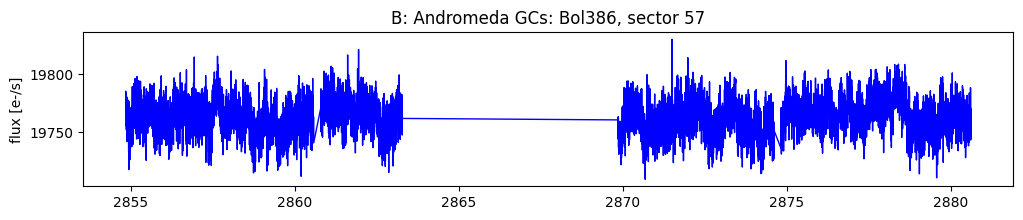

Bol386 sector 57 		mean: 1070.8269415849327 		sigma = 2509.992676820134 ppm


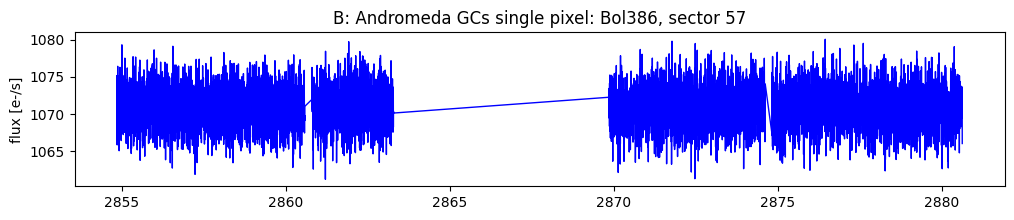

In [2]:
#outliers from sigma-magnitude plots

import matplotlib.pyplot as plt
import os
import numpy as np
from astropy.table import Table
from astropy.io import fits

directory = 'Andromeda GCs'
method = 'full_hybrid'
diameter = '_diameter'
cleaned = '_cleaned'
data = ['Bol386']
sectors = ['57']

for j,i in enumerate(data):
    target = i
    sector = sectors[j]
    
    folder = 'D:results new/'+directory+'/'+target
    file = folder+'/'+target+'_sector'+sector+'_'+method+'_lc'+diameter+cleaned
    full_file_path = os.path.join(file + ".fits")

    lc = fits.open(file+'.fits')
    data_lc = lc[1].data
    time = data_lc['time']
    flux = data_lc['flux']
    meanflux = np.mean(flux)
    ppm = np.std(flux) / meanflux * 1000000
    
    print(target,'sector',sector,'\t\tmean:',meanflux,'\t\tsigma =',ppm,'ppm')     
    plt.figure(figsize=(12, 2))
    plt.plot(time, flux, color='b', linewidth=1)
    plt.ylabel("flux [e-/s]")
    plt.title(directory+': '+target+', sector '+sector)
    plt.show() #"""
    
    directory = 'Andromeda GCs single pixel'
    folder = 'D:results new/'+directory+'/'+target
    file = folder+'/'+target+'_sector'+sector+'_'+method+'_lc'+diameter+cleaned
    full_file_path = os.path.join(file + ".fits")
    lc = fits.open(file+'.fits')
    data_lc = lc[1].data
    time = data_lc['time']
    flux = data_lc['flux']
    meanflux = np.mean(flux)
    ppm = np.std(flux) / meanflux * 1000000
    print(target,'sector',sector,'\t\tmean:',meanflux,'\t\tsigma =',ppm,'ppm')     
    plt.figure(figsize=(12, 2))
    plt.plot(time, flux, color='b', linewidth=1)
    plt.ylabel("flux [e-/s]")
    plt.title(directory+': '+target+', sector '+sector)
    plt.show() #"""